<div style="text-align:right;">Classification by using Keras</div>
<div style="text-align:right;">Brickea with material from mofan python</div>

# Classification problem

## Data Import

用到的数据集是 MNIST，就是 0 到 9 这几个数字的图片数据集。

In [68]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))
tf.test.is_gpu_available()

Num GPUs Available:  1
Num CPUs Available:  1


True

Keras 自身就有 MNIST 这个数据包，再分成训练集和测试集。x 是一张张图片，y 是每张图片对应的标签，即它是哪个数字。

输入的 x 变成 60,000*784 的数据，然后除以 255 进行标准化，因为每个像素都是在 0 到 255 之间的，标准化之后就变成了 0 到 1 之间。

对于 y，要用到 Keras 改造的 numpy 的一个函数 np_utils.to_categorical，把 y 变成了 one-hot 的形式，即之前 y 是一个数值， 在 0-9 之间，现在是一个大小为 10 的向量，它属于哪个数字，就在哪个位置为 1，其他位置都是 0。

In [69]:
(train_X,train_y),(test_X,test_y) = mnist.load_data()

In [70]:
train_X.shape

(60000, 28, 28)

In [71]:
train_y.shape

(60000,)

In [72]:
# Normalize
train_X = train_X.reshape(train_X.shape[0],-1) / 255
test_X = test_X.reshape(test_X.shape[0],-1) / 255
train_y = tf.keras.utils.to_categorical(train_y,num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y,num_classes=10)

## Create Model

今天会讲到几种不同的方式来建立和训练模型。

相关的包

* models.Sequential，用来一层一层一层的去建立神经层；
* layers.Dense 意思是这个神经层是全连接层。
* layers.Activation 激励函数。
* optimizers.RMSprop 优化器采用 RMSprop，加速神经网络训练方法。

In [73]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import RMSprop 

在回归网络中用到的是 model.add 一层一层添加神经层，今天的方法是直接在模型的里面加多个神经层。好比一个水管，一段一段的，数据是从上面一段掉到下面一段，再掉到下面一段。

第一段就是加入 Dense 神经层。32 是输出的维度，784 是输入的维度。 第一层传出的数据有 32 个 feature，传给激励单元，激励函数用到的是 relu 函数。 经过激励函数之后，就变成了非线性的数据。 然后再把这个数据传给下一个神经层，这个 Dense 我们定义它有 10 个输出的 feature。同样的，此处不需要再定义输入的维度，因为它接收的是上一层的输出。 接下来再输入给下面的 softmax 函数，用来分类。

In [74]:
model = Sequential([
    Dense(32,input_dim = 784),
    Activation('relu'),
    Dense(10,input_dim = 32),
    Activation('softmax')
])

接下来用 RMSprop 作为优化器，它的参数包括学习率等，可以通过修改这些参数来看一下模型的效果。

In [75]:
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

## Activate Model

接下来用 model.compile 激励神经网络。

优化器，可以是默认的，也可以是我们在上一步定义的。 损失函数，分类和回归问题的不一样，用的是交叉熵。 metrics，里面可以放入需要计算的 cost，accuracy，score 等。

In [76]:
model.compile(
    optimizer = rmsprop,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

## Train Model

这里用到的是 fit 函数，把训练集的 x 和 y 传入之后，nb_epoch 表示把整个数据训练多少次，batch_size 每批处理32个。

In [78]:
%%time
model.fit(train_X,train_y,epochs = 20,batch_size = 1000)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 0s 6us/sample - loss: 0.5904 - accuracy: 0.8583
Epoch 2/20
60000/60000 [==============================] - 0s 4us/sample - loss: 0.3620 - accuracy: 0.9003
Epoch 3/20
60000/60000 [==============================] - 0s 4us/sample - loss: 0.3036 - accuracy: 0.9150
Epoch 4/20
60000/60000 [==============================] - 0s 4us/sample - loss: 0.2733 - accuracy: 0.9233
Epoch 5/20
60000/60000 [==============================] - 0s 4us/sample - loss: 0.2525 - accuracy: 0.9282
Epoch 6/20
60000/60000 [==============================] - 0s 4us/sample - loss: 0.2361 - accuracy: 0.9337
Epoch 7/20
60000/60000 [==============================] - 0s 4us/sample - loss: 0.2224 - accuracy: 0.9373
Epoch 8/20
60000/60000 [==============================] - 0s 4us/sample - loss: 0.2097 - accuracy: 0.9410
Epoch 9/20
60000/60000 [==============================] - 0s 4us/sample - loss: 0.1987 - accuracy: 0.9441
Epoch 10/20
60000/60000

## Test Model

接下来就是用测试集来检验一下模型，方法和回归网络中是一样的，运行代码之后，可以输出 accuracy 和 loss。

In [41]:
%%time
print("test---------")

loss,accuracy = model.evaluate(test_X,test_y)

print("loss: %f accuracy: %f"%(loss,accuracy))

test---------
10000/10000 [==============================] - 1s 53us/sample - loss: 0.1609 - accuracy: 0.9520
loss: 0.160891 accuracy: 0.952000
Wall time: 556 ms


## Visualization

In [42]:
from matplotlib import pyplot as plt
import numpy as np

2


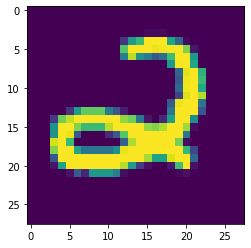

In [43]:
(train_X,train_y),(test_X,test_y) = mnist.load_data()
index = np.random.randint(0,len(test_X))
plt.imshow(test_X[index])

for index,val in enumerate(model.predict(test_X[index].reshape(1,-1))[0]):
    if val==1:
        print(index)